## Using Portland Crime Data from 2013-2015:  

## Aggregate crime counts within each census tract for each week. Which tracts have the worst/best overall crime trends over that period of time?

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


Data downloaded from http://nij.gov/funding/Pages/fy16-crime-forecasting-challenge.aspx
Section 'X' contains download links for zipped folders containing data in Excel format.

For a census tract map - go here --> https://www2.census.gov/geo/maps/dc10map/tract/st41_or/c41051_multnomah/DC10CT_C41051_001.pdf

In [2]:
#upload raw data
file2013 = r"C:\Users\natehow\Emergency Response\Data\NIJ2013_JAN01_DEC31.xlsx"
file2014 = r"C:\Users\natehow\Emergency Response\Data\NIJ2014_JAN01_DEC31.xlsx"
file2015 = r"C:\Users\natehow\Emergency Response\Data\NIJ2015_JAN01_DEC31.xlsx"
data2013 = pd.read_excel(file2013)
data2014 = pd.read_excel(file2014)
data2015 = pd.read_excel(file2015)

#append all data into one variable
data = data2013.append(data2014.append(data2015))
data.head()

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7625659,714714,4101.0
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7628093,655826,6404.0
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7631900,704307,4002.0
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643655,682985,10600.0
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643778,681457,10600.0


### Data descriptions: 
8 columns
 - CATEGORY: Street Crimes, Burglary, Motor Vehicle Theft, Other
 - CALL GROUPS: Suspicious, Disorder, Non-Criminal/Admin, Person Crime, Property Crime, Traffic
 - final_case_type: subsets of CATEGORY. 99 total types
 - CASE DESC: Description of the final_case_type code. 
 - occ_date: Date of Occurence
 - x_coordinate: longitute in Oregon State Projection - Oregon North FIPS 3601 - NAD83
 - y_coordinate: latitude in Oregon State Projection - Oregon North FIPS 3601 - NAD83
 - census_tract: Census tract in which the crime occured.

In [3]:
#add a week column to separate crimes by week. Create function for assigning a week based on a given start-date. 
refdate = pd.to_datetime("2012-12-30")
def weeknum(date):
    diff = pd.to_datetime(date)-refdate
    return int(diff.days/7)

data['week'] = data['occ_date'].apply(lambda x: weeknum(x))
data.head()

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract,week
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7625659,714714,4101.0,0
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7628093,655826,6404.0,0
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7631900,704307,4002.0,0
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643655,682985,10600.0,0
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643778,681457,10600.0,0


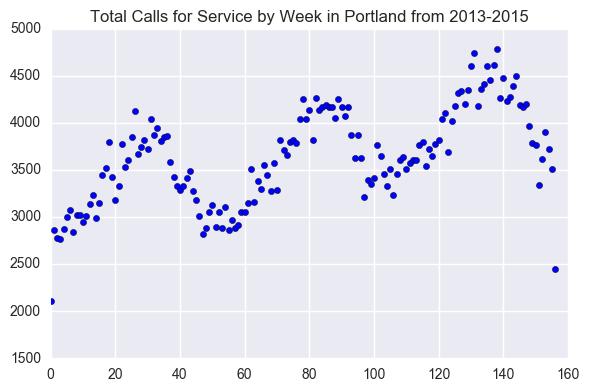

In [4]:
#plot total Portland crime by week
total_by_week = data.groupby('week')
weeklytotal_df = pd.DataFrame({'week' : [], 'total' : []})
for week,group in total_by_week:
    total = len(group)
    add_df = pd.DataFrame({'week' : [week], 'total' : [total]})
    weeklytotal_df = weeklytotal_df.append(add_df)

fig = plt.figure()
a = fig.add_subplot(111)
a.set_title('Total Calls for Service by Week in Portland from 2013-2015')
a.set_xlim(0,160)
a.scatter(weeklytotal_df.week,weeklytotal_df.total)
plt.tight_layout()

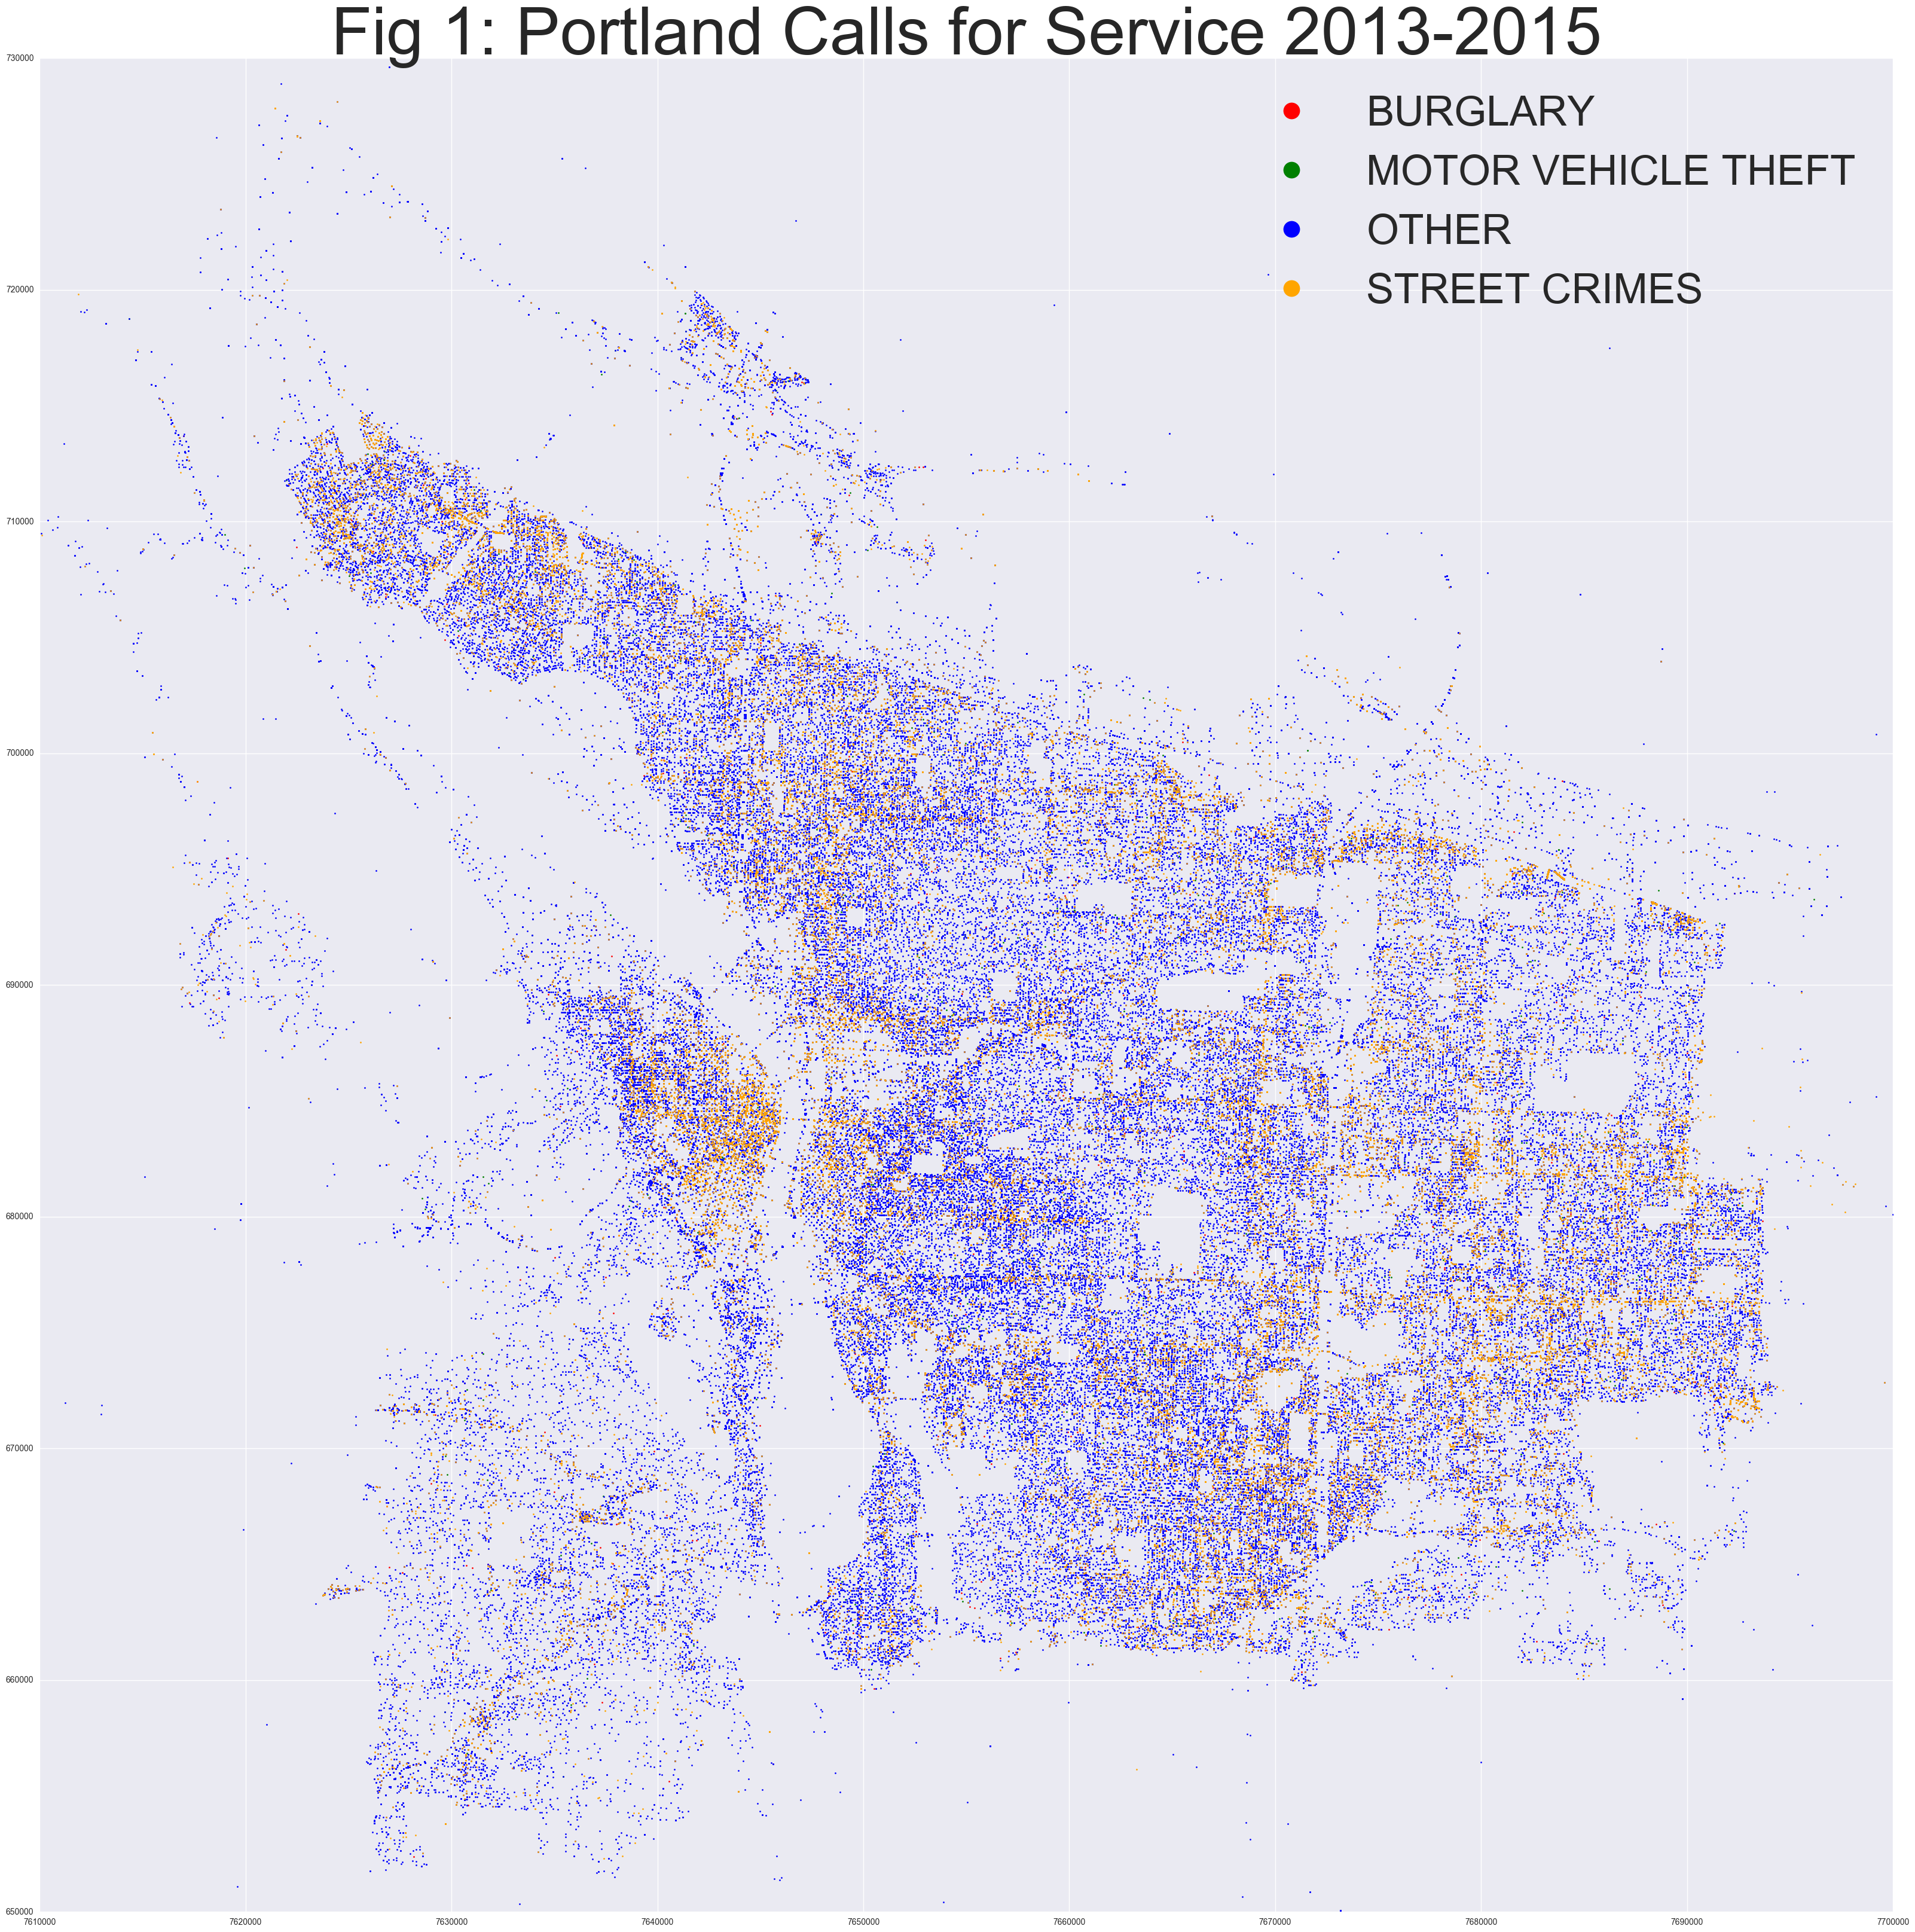

In [12]:
#now we want to see the physical location of all the crimes, plotted by Category
map_groups = data.groupby('CATEGORY')
fig1, ax1 = plt.subplots()
fig1.set_figwidth(40)
fig1.set_figheight(40)
colors = ['red','green','blue','orange']
for index,(name,group) in enumerate(map_groups):
    ax1.plot(group.x_coordinate,group.y_coordinate, marker='o', linestyle='', ms=2, 
            label=name, color = colors[index], markeredgecolor = colors[index])
    ax1.set_xlim(7610000,7700000)
    ax1.set_ylim(650000,730000)
ax1.legend(prop={'size':50}, markerscale=10)
ax1.set_title('Fig 1: Portland Calls for Service 2013-2015', fontsize = 80)
fig1.savefig('all-calls-for-service.png')

In [8]:
#The only NA data is in the census_tract column. Shown below when census_tract counts are not equal to all the others. 
total_by_week.count().head()

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
week,,,,,,,,
0,2113,2113,2113,2113,2113,2113,2113,2006
1,2862,2862,2862,2862,2862,2862,2862,2672
2,2776,2776,2776,2776,2776,2776,2776,2615
3,2764,2764,2764,2764,2764,2764,2764,2583
4,2870,2870,2870,2870,2870,2870,2870,2705


In [10]:
#plot NA data by location. 
no_tract = data.fillna(value = 0)
no_tract_zero = no_tract[no_tract['census_tract']==0]
no_tract_zero.count()

CATEGORY           35428
CALL GROUPS        35428
final_case_type    35428
CASE DESC          35428
occ_date           35428
x_coordinate       35428
y_coordinate       35428
census_tract       35428
week               35428
dtype: int64

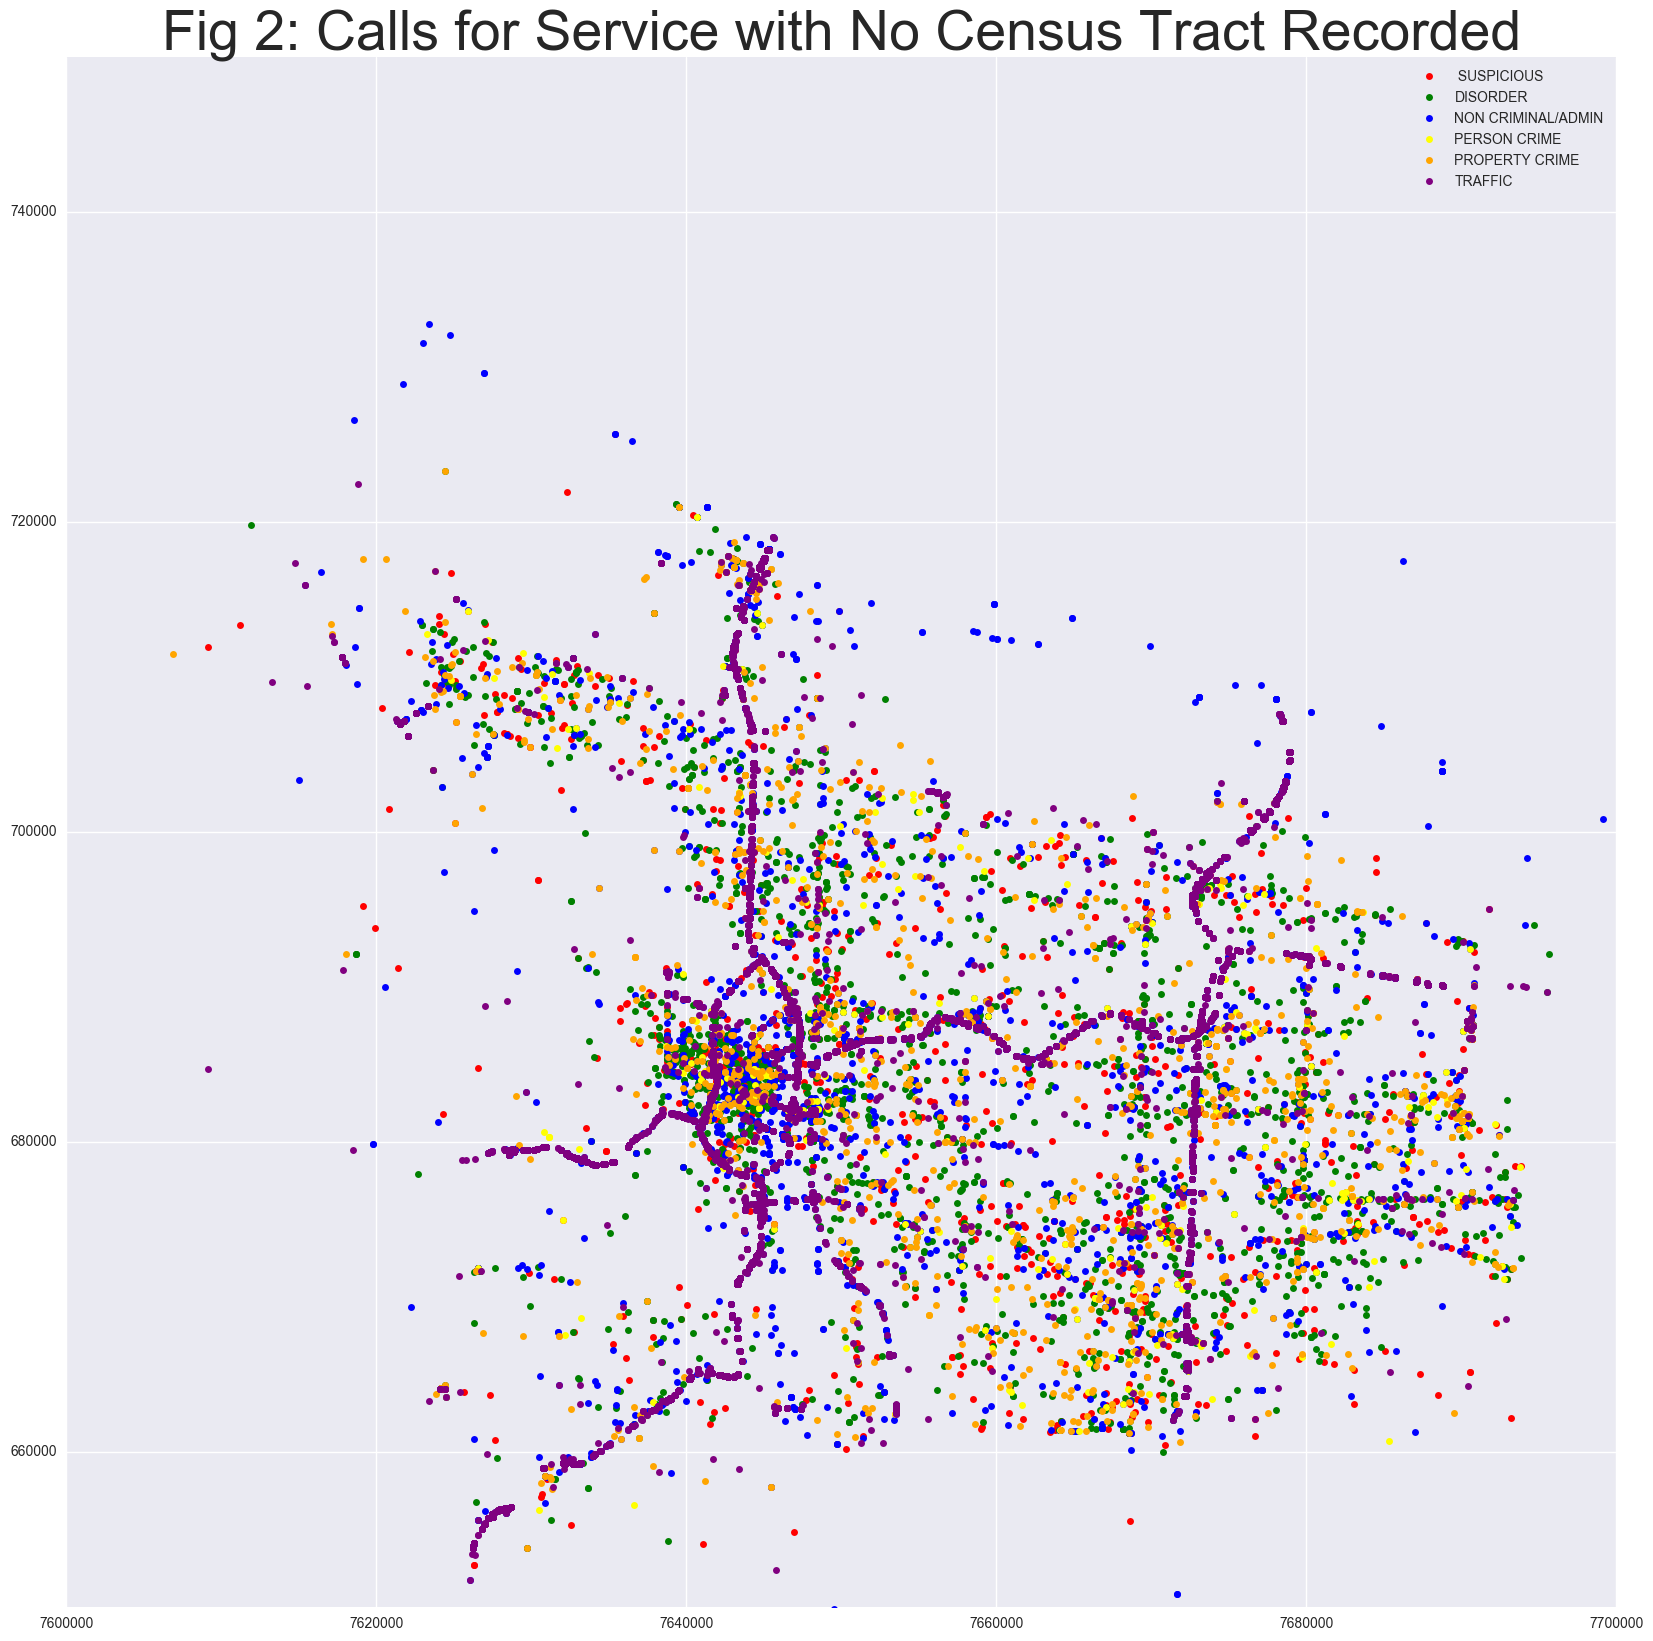

In [17]:
no_tract_groups = no_tract_zero.groupby('CALL GROUPS')
fig2, ax2 = plt.subplots()
fig2.set_figwidth(20)
fig2.set_figheight(20)
colors = ['red','green','blue','yellow','orange','purple']
for index,(name,group) in enumerate(no_tract_groups):
    ax2.plot(group.x_coordinate,group.y_coordinate, marker='o', linestyle='', ms=5, 
            label=name, color = colors[index], markeredgecolor = colors[index])
    ax2.set_xlim(7600000,7700000)
    ax2.set_ylim(650000,750000)
ax2.legend()
ax2.set_title("Fig 2: Calls for Service with No Census Tract Recorded", fontsize = 40)
#fig.savefig("no_tracts.png")

The plot above shows calls for service that were not recorded with a census tract. All of the call groups appear spread out and random except traffic. We will eliminate traffic from the data set moving forward and analyze it separately. 

In [22]:
all_no_traffic = data[data['CALL GROUPS'] != 'TRAFFIC']

#we also need to remove week 1 and week 156 because they are partial weeks. 
all_no_traffic = all_no_traffic[all_no_traffic['week'] != 0]
all_no_traffic = all_no_traffic[all_no_traffic['week'] != 156]

#group data by census tract and week
by_tract_week = all_no_traffic.groupby(["census_tract","week"],as_index = False)

#ensure columns are integers, rename to 'total'
counted = by_tract_week['CATEGORY'].count()
counted['CATEGORY'] = counted['CATEGORY'].apply(int)
counted['week'] = counted['week'].apply(int)
counted.columns = ['census_tract','week','total']
print(counted.head())

   census_tract  week  total
0         100.0     1     15
1         100.0     2     19
2         100.0     3     16
3         100.0     4     20
4         100.0     5      8


In [53]:
#group counted data frame by census tract
tract_totals = counted.groupby('census_tract')

#create empty data frame to contain census tract and linear regression information
changes = pd.DataFrame({'census_tract' : [],'observations': [], 'slope' : [], 'intercept' : [], 
                        'rsq' : [], 'pvalue' : []})

for i,tract in tract_totals:
    model = sm.OLS(tract.total,sm.add_constant(tract.week))
    results = model.fit()
    rsq = round(results.rsquared,3)
    if rsq == 0:
        slope = 0
    else:
        slope = round(results.params[1],2)
    size = len(tract)
    pvalue = round(results.pvalues[1],4)
    intercept = round(results.params[0],1)
    add = pd.DataFrame({'census_tract' : [i],'observations' : [size], 'slope' : [slope], 'intercept' : [intercept],
                        'rsq' : [rsq], 'pvalue' : [pvalue]})
    changes = changes.append(add)
    
changes.head()
    

,census_tract,intercept,observations,pvalue,rsq,slope
0,100.0,15.1,154.0,0.0000,0.107,0.05
0,200.0,11.6,154.0,0.0000,0.272,0.07
0,301.0,13.3,154.0,0.0284,0.031,0.02
0,302.0,9.3,154.0,0.0250,0.033,0.02
0,401.0,13.3,154.0,0.0437,0.026,0.02


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4427
Date:                Tue, 06 Dec 2016   Prob (F-statistic):              0.507
Time:                        20:21:17   Log-Likelihood:                -442.62
No. Observations:                 154   AIC:                             889.2
Df Residuals:                     152   BIC:                             895.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.9066      0.703     21.203      0.0

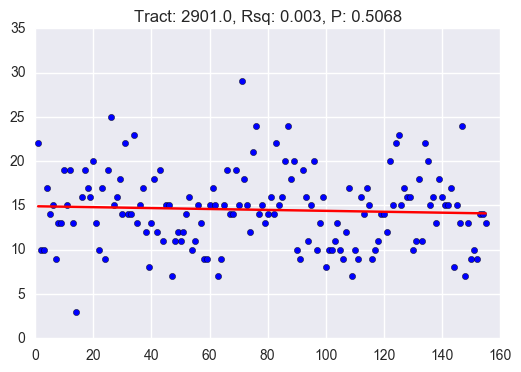

In [47]:
#for example tract least squares summary, use this. 
tract = 2901.0

example = tract_totals.get_group(tract)
examplemodel = sm.OLS(example.total,sm.add_constant(example.week))
example_results = examplemodel.fit()
print(example_results.summary())

fig3 = plt.figure()
a = fig3.add_subplot(1,1,1)
a.set_xlim(0,160)
a.plot(example.week,example_results.fittedvalues,'r')
a.scatter(example.week,example.total)
a_title = ('Tract: {}, Rsq: {}, P: {}'.format(tract,float(changes[changes['census_tract'] == tract].rsq),
                                             float(changes[changes['census_tract'] == tract].pvalue)))
a.set_title(a_title)


In [55]:
sort_by_slope = changes.sort_values('slope', ascending = False)
sort_by_slope = sort_by_slope[sort_by_slope['observations'] > 50] #want to remove tracts with crime that doesn't happen 'often enough'
sort_by_slope.head()

,census_tract,intercept,observations,pvalue,rsq,slope
0,5100.0,97.0,154.0,0.0,0.466,0.44
0,10600.0,130.2,155.0,0.0,0.316,0.41
0,7300.0,22.7,154.0,0.0,0.522,0.16
0,2100.0,40.6,154.0,0.0,0.346,0.16
0,8100.0,66.5,154.0,0.0,0.145,0.14


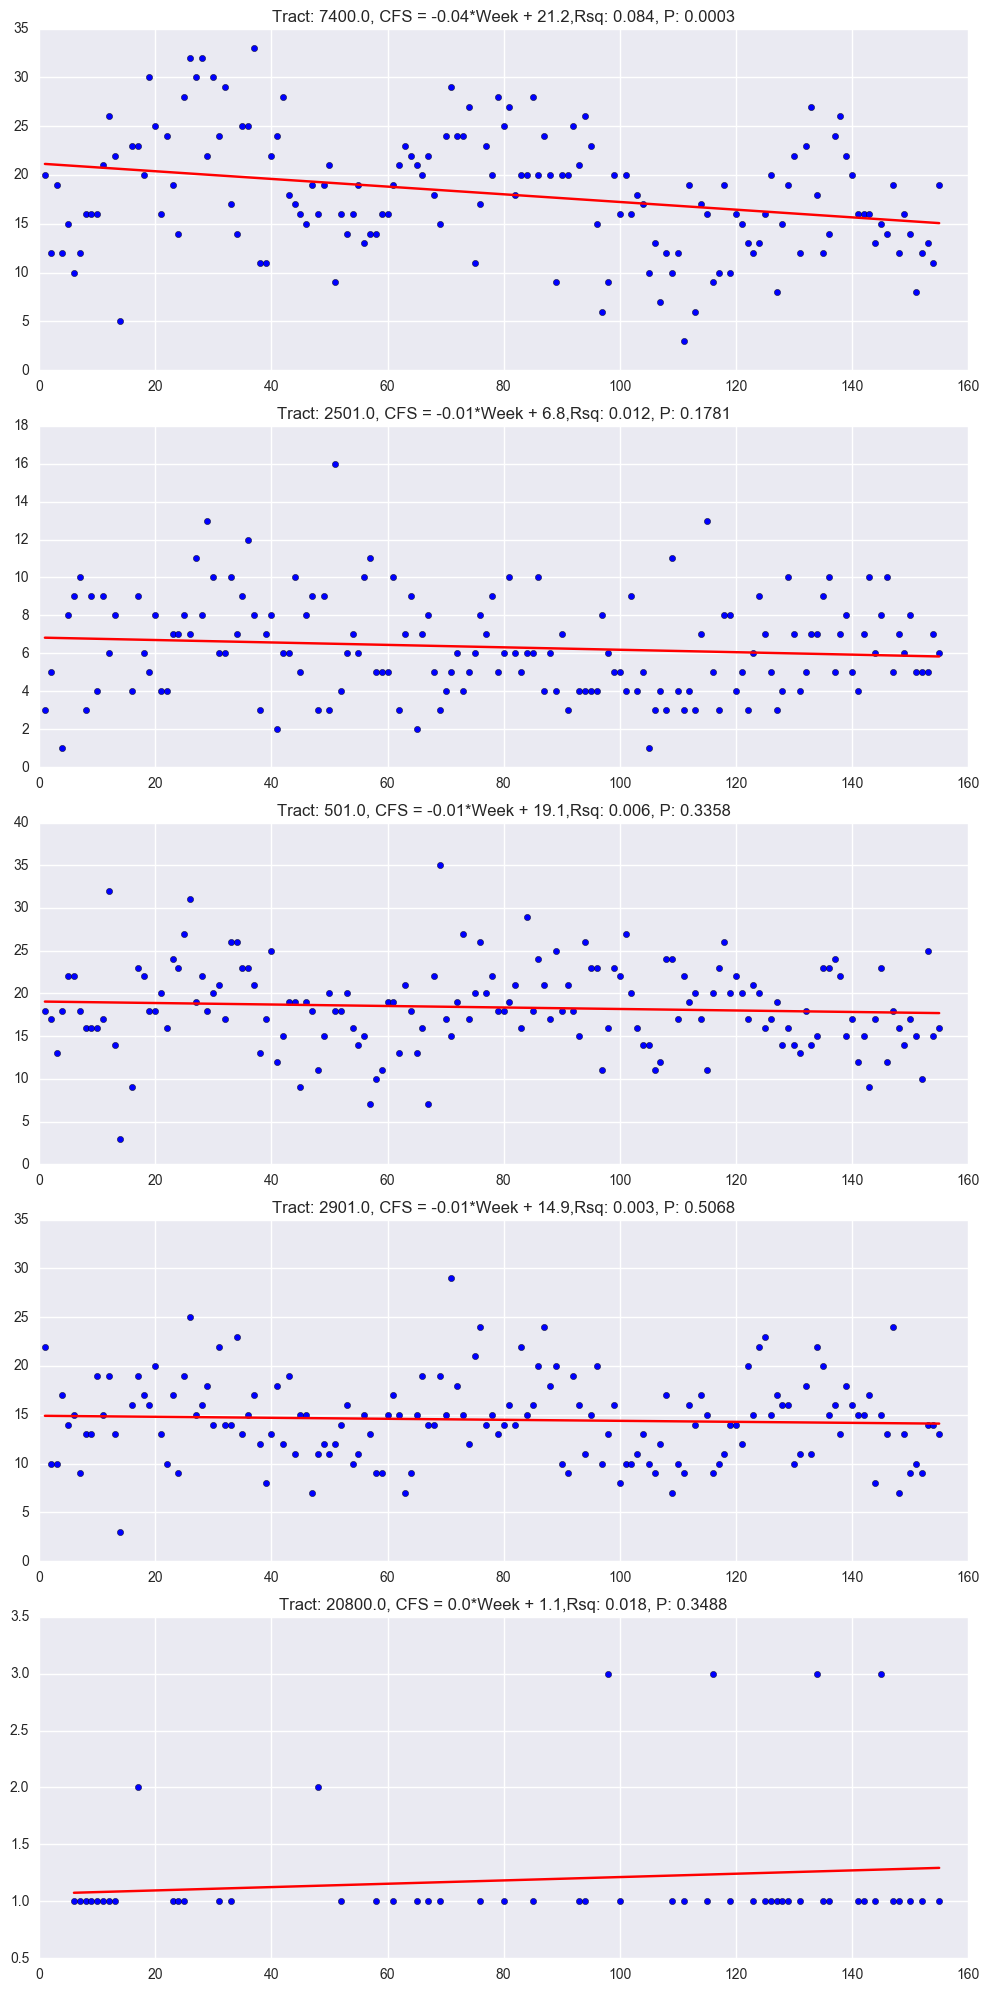

In [63]:
best = sort_by_slope.tail()
worst = sort_by_slope.head()
fig4 = plt.figure()
fig4.set_figheight(20)
fig4.set_figwidth(10)

for index,tract in enumerate(best['census_tract'], start = 0): 
    get_tract = tract_totals.get_group(tract)
    tractmodel = sm.OLS(get_tract.total,sm.add_constant(get_tract.week))
    tract_results = tractmodel.fit()
    a = fig4.add_subplot(5,1,(5-index))
    a.set_xlim(0,160)
    rsq = float(best[best['census_tract'] == tract].rsq)
    slope = float(best[best['census_tract'] == tract].slope)
    pvalue = float(best[best['census_tract'] == tract].pvalue)
    intercept = float(best[best['census_tract'] == tract].intercept)
    a.plot(get_tract.week, tract_results.fittedvalues, 'r')
    a.scatter(get_tract.week,get_tract.total)
    title = ('Tract: {}, CFS = {}*Week + {},Rsq: {}, P: {}'.format(tract,slope,intercept,rsq,pvalue))
    a.set_title(title)

plt.tight_layout()

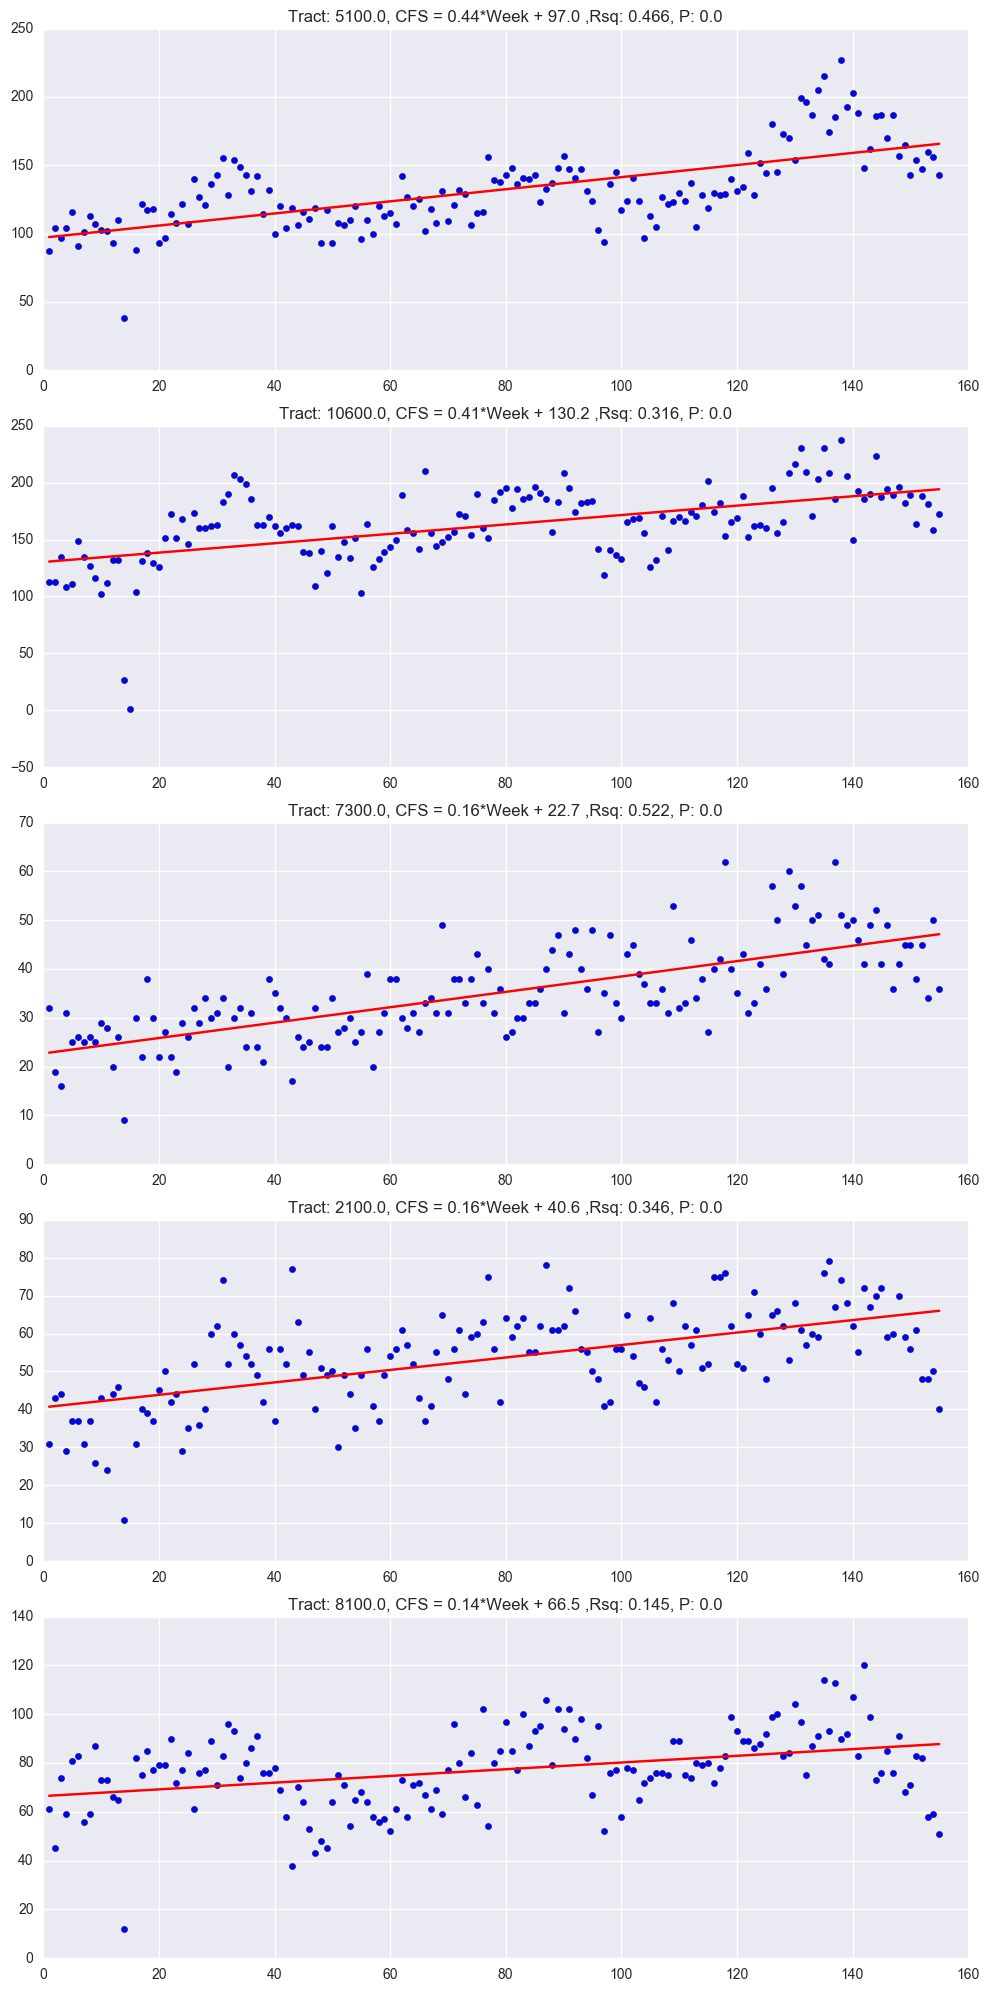

In [69]:
fig5 = plt.figure()
fig5.set_figheight(20)
fig5.set_figwidth(10)

for index,tract in enumerate(worst['census_tract'], start = 1): 
    get_tract = tract_totals.get_group(tract)
    tractmodel = sm.OLS(get_tract.total,sm.add_constant(get_tract.week))
    tract_results = tractmodel.fit()
    a = fig5.add_subplot(5,1,index)
    a.set_xlim(0,160)
    rsq = float(worst[worst['census_tract'] == tract].rsq)
    slope = float(worst[worst['census_tract'] == tract].slope)
    pvalue = float(worst[worst['census_tract'] == tract].pvalue)
    intercept = float(worst[worst['census_tract'] == tract].intercept)
    a.plot(get_tract.week, tract_results.fittedvalues, 'r')
    a.scatter(get_tract.week,get_tract.total)
    title = ('Tract: {}, CFS = {}*Week + {} ,Rsq: {}, P: {}'.format(tract,slope,intercept,rsq,pvalue))
    a.set_title(title)

plt.tight_layout()